## Import Libraries

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [94]:
data = pd.read_csv("Ads_CTR_Optimisation.csv")
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [95]:
data.shape

(10000, 10)

## `Upper Confidence Bound` method

In [96]:
import math

In [97]:
n_rounds = 10_000
n_ads = 10
ad_selection_count = [1] * n_ads
ad_selection_reward = [0] * n_ads
for n in range(1, n_rounds+1):
    max_ub = 0
    selected_ad = 0
    for ad in range(n_ads):
        reward_rate = ad_selection_reward[ad] / ad_selection_count[ad]
        del_i = math.sqrt(1.5 * (math.log(n) / ad_selection_count[ad]))
        ad_ub = reward_rate + del_i
        if(ad_ub > max_ub):
            selected_ad = ad
            max_ub = ad_ub
    ad_selection_count[selected_ad] += 1
    ad_selection_reward[selected_ad] += data.iloc[n-1, selected_ad]


### `Visualize` result

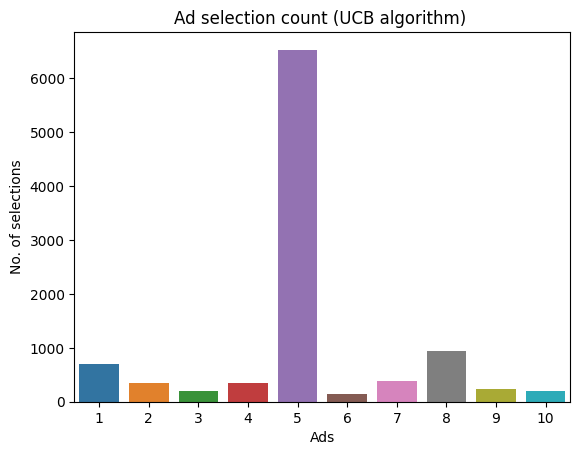

In [98]:
sns.barplot(x = pd.Series(np.arange(1, 11, 1)), y = pd.Series(ad_selection_count))
plt.xlabel("Ads")
plt.ylabel("No. of selections")
plt.title("Ad selection count (UCB algorithm) ")
plt.show()

## `Thompson Sampling` method

In [99]:
import random

In [100]:
n_rounds = 10_000
n_ads = 10
positive_reward_count = [1] * n_ads
negative_reward_count = [1] * n_ads
ad_selection_count = [0] * n_ads
for n in range(1, n_rounds+1):
    max_prob = 0
    selected_ad = 0
    for ad in range(n_ads):
        ad_prob = random.betavariate(positive_reward_count[ad], negative_reward_count[ad])
        if(ad_prob > max_prob):
            selected_ad = ad
            max_prob = ad_prob
    reward = data.iloc[n-1, selected_ad]
    if reward == 1:
        positive_reward_count[selected_ad] += 1
    else:
        negative_reward_count[selected_ad] += 1
    ad_selection_count[selected_ad] += 1


### `Visualize` result

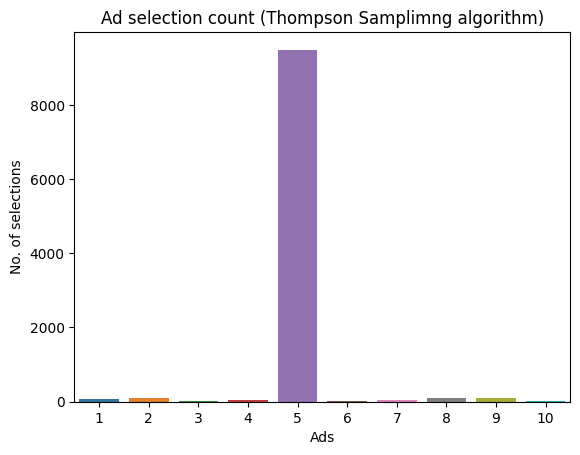

In [101]:
sns.barplot(x = pd.Series(np.arange(1, 11, 1)), y = pd.Series(ad_selection_count))
plt.xlabel("Ads")
plt.ylabel("No. of selections")
plt.title("Ad selection count (Thompson Samplimng algorithm)")
plt.show()

# **Conclusion** : **`Ad 5` generates most revenue**